# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the downtown area, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [1]:
# import libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Read the file with data from Yandex.Realty and save it to "df_realty".

In [2]:
# read the real_estate_data.csv and use "sep" parameter
df_realty = pd.read_csv('df_realty.csv', sep='\t')

Look at the general information of "df_realty".

In [3]:
df_realty.info() # use info() method

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Print the first 5 rows.

In [4]:
pd.set_option('display.max_columns', 22) # set max display columns
df_realty.head() # print the top 5 rows

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Use describe() method for more information.

Check the numeric values.

In [5]:
df_realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Check the quantitative values.

In [6]:
df_realty.describe(include='object')

,first_day_exposition,is_apartment,locality_name
count,23699,2775,23650
unique,1491,2,364
top,2018-02-01T00:00:00,False,Санкт-Петербург
freq,368,2725,15721


Check the "bool" values.

In [7]:
df_realty.describe(include='bool')

,studio,open_plan
count,23699,23699
unique,2,2
top,False,False
freq,23550,23632


 <font color='green'>Ok, you already distinguish between numeric and quantitative values quite well, that's great!

### Conclusion

There is the table with 22 columns and 23699 rows with information about.
- *airports_nearest* - the distance to the nearest airport in meters (m.).
- *balcony* - the number of balconies.
- *ceiling_height* - the ceiling height in meters (m.).
- *cityCenters_nearest* - the distance to the downtown area in meters (m.).
- *days_exposition* - how many days the ad was displayed (from publication to removal).
- *first_day_exposition* - the publication date.
- *floor* - the apartment floor.
- *floors_total* - the total number of floors in the building.
- *is_apartment* - whether it's an apartment or not (Boolean type).
- *kitchen_area* - the kitchen area in square meters (sq.m.).
- *last_price* - the price at the time when the ad was removed.
- *living_area* - the living area in square meters (sq.m.).
- *locality_name* - the locality name.
- *open_plan* - an open plan design (Boolean type).
- *parks_around3000* - the number of parks in a 3 km. radius.
- *parks_nearest* - the distance to the nearest park in meters (m.).
- *ponds_around3000* - the number of bodies of water in a 3 km. radius.
- *ponds_nearest* - the distance to the nearest body of water (m.).
- *rooms* - the number of rooms.
- *studio* - whether it's a studio or not (Boolean type).
- *total_area* - the total area in square meters (sq.m.).
- *total_images* - the number of photos of the apartment in the ad.
 
We have NaN values in these columns:
- *ceiling_height*
- *floors_total*
- *living_area* 
- *is_apartment*
- *kitchen_area*
- *balcony*
- *locality_name*
- *airports_nearest*
- *cityCenters_nearest*
- *parks_around3000*
- *parks_nearest*
- *ponds_around3000*
- *ponds_nearest*
- *days_exposition*

We need to change object type for these columns:
- *first_day_exposition* - from object to datetime.
- *floors_total* - from float to int.
- *is_apartment* - from object to bool.
- *balcony* - from float to int.
- *parks_around3000* - from float to int.
- *ponds_around3000* - from float to int.
- *days_exposition* - from float to int.

And others issues:
- *locality_name* - Russian name "Санкт-Петербург".
- *rooms* - min value = 0.
- *ceiling_height*- max height = 100 m.
- *floors_total* - there is no residential building, standing 60 metres tall in St. Petersburg.
- *airports_nearest* - min value = 0 m.

Let's fix our problems.

### Step 2. Data preprocessing

We should process NaN values, change the data types, check the data for duplicates and drop them.

### Processing missing values

Before we start fill NaN values, we need to fix strange values in "rooms", "ceiling_height", "floors_total", "airports_nearest".

**Process the "locality_name" column.**

Replace "Санкт-Петербург" to "Saint Petersburg".

In [8]:
df_realty['locality_name'].replace('Санкт-Петербург', 'Saint Petersburg', inplace=True) # use replace method
df_realty['locality_name'].value_counts()

Saint Petersburg                                     15721
посёлок Мурино                                         522
посёлок Шушары                                         440
Всеволожск                                             398
Пушкин                                                 369
                                                     ...  
деревня Тихковицы                                        1
посёлок при железнодорожной станции Приветнинское        1
садовое товарищество Рахья                               1
деревня Борисова Грива                                   1
садовое товарищество Новая Ропша                         1
Name: locality_name, Length: 364, dtype: int64

**Process the "rooms" column.**

In [9]:
df_realty['rooms'].value_counts() # use value_counts() method

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

We have 197 "rooms" = 0. Probably, that values are "studio" and "open_plan".

In [10]:
df_realty.query('rooms == 0 and (studio == True or open_plan == True)')['rooms'].count() # use query method

197

Yes, that sounds about right. But it is at least strange that the number of rooms = 0, even for a studio. At least one room, even if combined with the kitchen in the apartment, should be. So I think "rooms" column isn't rooms. It's bedrooms. Later we'll be write "rooms", but it will be "bedrooms" instead. 

Look at the "studio" where "rooms" != 0.

In [11]:
df_realty.query('rooms != 0 and studio == True')['studio'].count() # use query method

11

In [12]:
df_realty.query('rooms != 0 and studio == True') # use query method

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2389,5,2250000.0,25.41,2016-06-07T00:00:00,1,NaN,12.0,17.08,8,False,True,False,NaN,2.0,Saint Petersburg,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0
3187,13,3800000.0,27.00,2016-05-17T00:00:00,1,NaN,14.0,18.00,8,False,True,False,NaN,2.0,Saint Petersburg,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0
4180,4,4500000.0,34.00,2016-04-25T00:00:00,1,2.8,10.0,21.00,10,False,True,False,NaN,2.0,Saint Petersburg,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0
8683,10,3500000.0,32.50,2016-05-05T00:00:00,1,3.0,23.0,29.90,11,False,True,False,NaN,2.0,Saint Petersburg,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0
11026,1,2800000.0,28.00,2016-05-04T00:00:00,1,NaN,26.0,19.00,6,False,True,False,NaN,2.0,посёлок Парголово,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0
12935,10,2200000.0,31.00,2016-05-15T00:00:00,1,2.5,8.0,22.30,5,False,True,False,NaN,1.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.0
15142,2,2700000.0,30.00,2016-05-10T00:00:00,1,NaN,21.0,26.00,6,False,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.0
18732,4,2400000.0,22.00,2016-05-06T00:00:00,1,NaN,10.0,15.00,6,NaN,True,False,NaN,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20086,0,1550000.0,22.00,2016-05-11T00:00:00,1,2.7,15.0,10.94,14,False,True,False,NaN,2.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.0
21702,9,2349000.0,23.40,2016-05-19T00:00:00,1,2.7,20.0,16.00,8,False,True,False,NaN,1.0,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,34.0


As we see we have 11 values "rooms" = 1 and "studio" = True. So we can replace these rooms for 0.

In [13]:
# replace values with "0"
df_realty.loc[(df_realty['rooms'] != 0) & (df_realty['studio'] == True), 'rooms'] = 0

In [14]:
df_realty.query('rooms != 0 and studio == True')['studio'].count() # check the values

0

Later, the number of rooms equal to 0 will mean for us that this is a studio or an open plan.

**Process the "ceiling_height" column.**

In [15]:
df_realty['ceiling_height'].value_counts() # use value_counts() method

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

There's height above 10 m. But these are unlikely values. Maybe it was typos from user.

In [16]:
# count the number of height above 10 m
df_realty.query('ceiling_height >= 10')['ceiling_height'].count()

25

So we have 25 flats with height above 10 m. We replace them with median value. Because the median is resistant to outliers.

In [17]:
# count mean for "ceiling_height" column
median_height = df_realty['ceiling_height'].median()
median_height

2.65

In [18]:
# replace values > 10 with "median_height"
df_realty.loc[df_realty['ceiling_height'] >= 10, 'ceiling_height'] = median_height

In [19]:
df_realty.query('ceiling_height >= 10')['ceiling_height'].count() # check the values

0

**Process the "floors_total" column.**

In [20]:
df_realty['floors_total'].value_counts() # use value_counts() method

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [21]:
# count the number of height above 10 m
df_realty.query('floors_total >= 40')['floors_total'].count()

2

There's "floors_total" above 40. But these are unlikely values. Because the tallest residential building in St. Petersburg has 37 floors. Probably it's fake ads.  We replace these values with median value.

In [22]:
# count mean for "floors_total" column
median_floor_t = df_realty['floors_total'].median()
median_floor_t

9.0

In [23]:
# replace values > 40 with "median_floor_t"
df_realty.loc[df_realty['floors_total'] >= 40, 'floors_total'] = median_floor_t

In [24]:
df_realty.query('floors_total >= 40')['floors_total'].count() # check the values

0

Look at rows, where "floor" > "floors_total" if they exist.

In [25]:
df_realty[df_realty['floor'] > df_realty['floors_total']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16731,9,3978000.0,40.0,2018-09-24T00:00:00,1,2.65,9.0,10.5,18,NaN,False,False,14.0,NaN,Saint Petersburg,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


In [26]:
# replace value with "floors_total" = floor"
df_realty.loc[df_realty['floor'] > df_realty['floors_total'], 'floors_total'] = 18

In [27]:
df_realty[df_realty['floor'] > df_realty['floors_total']]['floor'].count()

0

**Process the "airports_nearest" column.**

In [28]:
df_realty['airports_nearest'].value_counts() # use value_counts() method

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
25122.0     1
26768.0     1
22248.0     1
20475.0     1
14579.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [29]:
# count the number of height above 10 m
df_realty.query('airports_nearest <= 3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,False,False,6.0,2.0,Saint Petersburg,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


It's only one row. Drop it.

In [30]:
df_realty.drop(df_realty[df_realty['airports_nearest'] <= 3000].index, inplace=True) # drop row with NaN value in the "airports_nearest"

In [31]:
df_realty.query('airports_nearest <= 3000')['airports_nearest'].count() # check the values

0

### Fill NaN values

Look at the quantity of NaN values in "df_realty".

In [32]:
def num_nans(data):
    print('The number of NaN values in:')
    for column in data.columns:
        nan_vals = data[column].isnull().sum() # use isnull() method to count number of NaN values
        if nan_vals > 0:
            print('- {} ='.format(column), nan_vals)
num_nans(df_realty)

The number of NaN values in:
- ceiling_height = 9195
- floors_total = 86
- living_area = 1903
- is_apartment = 20923
- kitchen_area = 2278
- balcony = 11519
- locality_name = 49
- airports_nearest = 5542
- cityCenters_nearest = 5519
- parks_around3000 = 5518
- parks_nearest = 15619
- ponds_around3000 = 5518
- ponds_nearest = 14588
- days_exposition = 3181


- "floors_total": we replace with mode value.
- "ceiling_height", "days_exposition", "living_area", "kitchen_area", "airports_nearest", "cityCenters_nearest", "parks_nearest", "ponds_nearest": do nothing, leave it as it is. Because we have a lot of missing values. If we replace them with something, then this may affect further analysis.
- "balcony", "parks_around3000", "ponds_around3000": probably user doesn't write values, because the flat hasn't "balcony", "parks_around3000" and "ponds_around3000". So we replace with 0.
- "locality_name": There is a small quantity of NaN, see and then we decide.
- "is_apartment": probably user doesn't write values, because it isn't apartment. So we replace it with "False".
- "kitchen_area", "living_area": let's look closely at these columns.

There is hypotesis: we have NaN in "parks_around3000", "ponds_around3000", because there is no parks or ponds  closer than 3000 m . Use query() method to evaluate NaN in these columns.

In [33]:
df_realty.query('parks_nearest <=3000')['parks_around3000'].isnull().sum()

0

In [34]:
df_realty.query('ponds_nearest <=3000')['ponds_around3000'].isnull().sum()

0

We haven't got NaN in "parks_around3000", "ponds_around3000" when "parks_nearest", "ponds_nearest" <= 3000 m. That sounds about right.

*Replace NaN values with mode value in the "floors_total".*

In [35]:
# count the mode for 'floors_total'
mode_floors = df_realty['floors_total'].mode()[0]
# replace NaN with  "mode_floors" in "floors_total"
df_realty['floors_total'] = df_realty['floors_total'].fillna(mode_floors)

*Replace NaN values with mode value in the "ceiling_height".*

In [36]:
# count the mode for 'ceiling_height'
mode_height = df_realty['ceiling_height'].mode()[0]
# replace NaN with  "mode_height" in "ceiling_height"
df_realty['ceiling_height'] = df_realty['ceiling_height'].fillna(mode_height)

*Replace NaN values with 0 in the "balcony", "parks_around3000", "ponds_around3000".*

In [37]:
def fill_zero(data):
    for column in ('balcony', 'parks_around3000', 'ponds_around3000'):
        # replace NaN with  "0"
        data[column] = data[column].fillna(0)
            
fill_zero(df_realty)

*Replace NaN values for "kitchen_area".*

In [38]:
# group by "rooms" and replace values with mean
df_realty['kitchen_area'] = df_realty.groupby('rooms')['kitchen_area'].transform(lambda x: x.fillna(x.mean()))

In [39]:
# check the values
df_realty['kitchen_area'].isnull().sum()

208

In [40]:
# look at the NaN values
df_realty[df_realty['kitchen_area'].isnull()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.5,24.0,15.50,2,NaN,True,False,NaN,2.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0
349,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.5,14.0,17.00,1,NaN,False,True,NaN,0.0,деревня Кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0
440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.5,17.0,24.75,4,NaN,True,False,NaN,2.0,Saint Petersburg,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.5,26.0,24.30,19,NaN,False,True,NaN,1.0,посёлок Парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.5,10.0,NaN,7,NaN,True,False,NaN,0.0,посёлок Шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0


In [41]:
# check the values again with "rooms" == 0 and "studio" == True or "open_plan" == True
len(df_realty[(df_realty['kitchen_area'].isnull()) & ((df_realty['studio'] == True) | (df_realty['open_plan'] == True))])

208

So we can replace these NaN values with "0" in the "kitchen_area". Because this is "studio" and "open_plan". And there's no kitchen in these apartment types.

In [42]:
df_realty['kitchen_area'] = df_realty['kitchen_area'].fillna(0)

In [43]:
# check the values
df_realty['kitchen_area'].isnull().sum()

0

In [44]:
# check the values "kitchen_area" >= "total_area"
df_realty.query('kitchen_area >= total_area')['kitchen_area'].count()

0

We've fixed "kitchen_area".

*Replace NaN values for "living_area".*

In [45]:
# group by "rooms" and replace values with mean
df_realty['living_area'] = df_realty.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.mean()))

In [46]:
# check the values
df_realty['living_area'].isnull().sum()

0

In [47]:
# check the values with "living_area" > "total_area"
df_realty.query('living_area >= total_area')['living_area'].count()

37

We need to fix it.

In [48]:
# use the pivot_table
df_realty_liv_ratio = df_realty.pivot_table(index='rooms', values=['living_area', 'total_area'])
# create new column "ratio"
df_realty_liv_ratio['ratio'] = df_realty_liv_ratio['living_area'] / df_realty_liv_ratio['total_area']
df_realty_liv_ratio

,living_area,total_area,ratio
rooms,,,
0,18.879175,29.179904,0.646992
1,17.891478,37.659072,0.475091
2,31.736849,55.855089,0.568200
3,47.387941,77.764580,0.609377
4,66.983223,107.610763,0.622458
5,100.009247,161.474816,0.619349
6,130.983636,201.537619,0.649922
7,163.564151,265.325424,0.616466
8,168.683333,259.233333,0.650701


In [49]:
# count the mea
df_realty_liv_ratio_mean = df_realty_liv_ratio['ratio'].mean()
df_realty_liv_ratio_mean

0.6229279338959026

In [50]:
# replace "living_area" > "total_area" with "df_realty_liv_ratio_mean"
df_realty.loc[df_realty['living_area'] >= df_realty['total_area'], 'living_area'] = df_realty_liv_ratio_mean

In [51]:
# check the values with "living_area" > "total_area"
df_realty.query('living_area >= total_area')['living_area'].count()

0

We've fixed "living_area".

*Replace NaN values with "False" in the "is_apartment".*

In [52]:
df_realty['is_apartment'] = df_realty['is_apartment'].fillna('False')

*Look at NaN values in the "locality_name".*

In [53]:
df_realty[df_realty['locality_name'].isnull()]['cityCenters_nearest'].count()

41

In [54]:
df_realty[df_realty['locality_name'].isnull()].query('cityCenters_nearest < 15000')['cityCenters_nearest'].count()

28

We can see almost all values are nearby of city center. So replace them with "Saint Petersburg".

In [55]:
df_realty['locality_name'].fillna('Saint Petersburg', inplace=True)

In [56]:
df_realty[df_realty['locality_name'].isnull()]['cityCenters_nearest'].count() # check the values

0

### Data type replacement

Replace a type for with "astype()" method. It's fast method.
- first_day_exposition - from object to datetime.
- floors_total - from float to int.
- is_apartment - from object to bool.
- balcony - from float to int.
- parks_around3000 - from float to int.
- ponds_around3000 - from float to int.
- days_exposition - from float to int.
- rooms - from float to int.
- balcony - from float to int.

*Replace values from float to int in "floors_total", "parks_around3000", "ponds_around3000", "rooms" with astype() method.*

In [57]:
def repl_type(data):
    for column in ('floors_total', 'parks_around3000', 'ponds_around3000', 'rooms', 'balcony'):
        data[column] = data[column].astype(int) # replace type with "astype()" method

repl_type(df_realty)

*Replace values from float to int in "days_exposition" with to_numeric method, because we have NaN values.*

In [58]:
df_realty['days_exposition'] = pd.to_numeric(df_realty['days_exposition'], errors='ignore')

*Replace values from object to datetime in "first_day_exposition".*

In [59]:
# replace type with to_datetime func
df_realty['first_day_exposition'] = pd.to_datetime(df_realty['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

*Replace values from object to bool in "is_apartment".*

In [60]:
df_realty['is_apartment'] = df_realty['is_apartment'].astype(bool) # replace type with "astype()" method

In [61]:
df_realty.info() # check the values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23698 non-null int64
last_price              23698 non-null float64
total_area              23698 non-null float64
first_day_exposition    23698 non-null datetime64[ns]
rooms                   23698 non-null int64
ceiling_height          23698 non-null float64
floors_total            23698 non-null int64
living_area             23698 non-null float64
floor                   23698 non-null int64
is_apartment            23698 non-null bool
studio                  23698 non-null bool
open_plan               23698 non-null bool
kitchen_area            23698 non-null float64
balcony                 23698 non-null int64
locality_name           23698 non-null object
airports_nearest        18156 non-null float64
cityCenters_nearest     18179 non-null float64
parks_around3000        23698 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

### Processing duplicates

In [62]:
df_realty.duplicated().sum() # summarizes duplicates

0

There's no duplicates.

In [63]:
df_realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23698 non-null int64
last_price              23698 non-null float64
total_area              23698 non-null float64
first_day_exposition    23698 non-null datetime64[ns]
rooms                   23698 non-null int64
ceiling_height          23698 non-null float64
floors_total            23698 non-null int64
living_area             23698 non-null float64
floor                   23698 non-null int64
is_apartment            23698 non-null bool
studio                  23698 non-null bool
open_plan               23698 non-null bool
kitchen_area            23698 non-null float64
balcony                 23698 non-null int64
locality_name           23698 non-null object
airports_nearest        18156 non-null float64
cityCenters_nearest     18179 non-null float64
parks_around3000        23698 non-null int64
parks_nearest           8079 non-null float64
ponds_around30

### Conclusion

We've processed missing values, filled them, replaced types for all needed columns for convenience and clarity.

### Step 3. Make calculations and add them to the table

Let's make some calculations to understand data.

**Calculate the price per square meter and add to "price_m2" column**

In [64]:
df_realty['price_m2'] = df_realty['last_price'] / df_realty['total_area'] # add column 'price_m2'
df_realty['price_m2'].round(2) # round values to cents

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_m2, Length: 23698, dtype: float64

**Calculate the day of the week, month, and year that the ad was published and add to "weekday", "month", "year" columns**

In [65]:
df_realty['weekday'] = df_realty['first_day_exposition'].dt.weekday # add column 'weekday'
df_realty['month'] = df_realty['first_day_exposition'].dt.month # add column 'month'
df_realty['year'] = df_realty['first_day_exposition'].dt.year # add column 'year'

**Categorize by "floor" into "first", "last", "other" and add "floor_level" column**

In [66]:
def floor_level(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'first'
    if floor == floors_total:
        return 'last'
    else:
        return 'other'

df_realty['floor_level'] = df_realty.apply(floor_level, axis=1) # use apply() method to add 'floor_level' column
df_realty['floor_level'].value_counts() # check the values

other    17440
last      3341
first     2917
Name: floor_level, dtype: int64

**Calculate the ratio between the living space and the total area, the kitchen space and the total area, and add "ratio_living", "ratio_kitchen" columns.**

In [67]:
df_realty['ratio_living'] = df_realty['living_area'] / df_realty['total_area'] # add column 'ratio_living'
df_realty['ratio_kitchen'] = df_realty['kitchen_area'] / df_realty['total_area'] # add column 'ratio_kitchen'

### Conclusion

We've add new coluns and categorized data. It'll help us later.

### Step 4. Conduct exploratory data analysis and follow the instructions below:

### Look carefully at the "last_price", "total_area", "rooms", "ceiling_height". Plot a histogram for each parameter.

**Look at the "last_price" column.**

In [68]:
df_realty['last_price'].describe() # use describe() method

count    2.369800e+04
mean     6.541529e+06
std      1.088724e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799750e+06
max      7.630000e+08
Name: last_price, dtype: float64

We need to change data for more convenience. Divide to 1 million. And create new column "last_price_mil".

In [69]:
df_realty['last_price_mil'] = df_realty['last_price'] / 1000000 # divide 'last_price' to 1 million

In [70]:
df_realty['last_price_mil'].describe() # use describe() method

count    23698.000000
mean         6.541529
std         10.887243
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799750
max        763.000000
Name: last_price_mil, dtype: float64

In [71]:
df_realty.query('last_price_mil < 1').sort_values(by='last_price_mil') # use query method and sort_values

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_level,ratio_living,ratio_kitchen,last_price_mil
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.000000,25,True,False,...,0,NaN,8.0,111.834862,2,3,2019,last,0.293578,0.371560,0.012190
14911,5,430000.0,54.0,2018-06-26,2,2.50,3,31.736849,3,True,False,...,0,NaN,44.0,7962.962963,1,6,2018,last,0.587719,0.184807,0.430000
17456,7,430000.0,30.4,2019-04-22,1,2.50,2,16.000000,1,True,False,...,0,NaN,NaN,14144.736842,0,4,2019,first,0.526316,0.197368,0.430000
16274,18,440000.0,40.0,2018-07-10,1,2.50,5,17.891478,1,True,False,...,0,NaN,45.0,11000.000000,1,7,2018,first,0.447287,0.238765,0.440000
9581,7,450000.0,43.4,2018-08-31,2,2.50,5,30.300000,3,True,False,...,0,NaN,96.0,10368.663594,4,8,2018,other,0.698157,0.126728,0.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,9,990000.0,34.0,2016-05-31,2,2.50,2,26.000000,2,True,False,...,0,NaN,78.0,29117.647059,1,5,2016,last,0.764706,0.235294,0.990000
14341,8,990000.0,28.0,2018-01-04,1,2.50,2,18.000000,1,True,False,...,0,NaN,NaN,35357.142857,3,1,2018,first,0.642857,0.321429,0.990000
13420,3,995000.0,31.5,2015-05-13,1,2.50,5,17.000000,2,True,False,...,0,NaN,757.0,31587.301587,2,5,2015,other,0.539683,0.184127,0.995000
1761,11,999000.0,62.0,2018-02-15,4,2.50,5,46.000000,2,True,False,...,0,NaN,226.0,16112.903226,3,2,2018,other,0.741935,0.112903,0.999000


It's only one "012190" value. So drop it.

In [72]:
# drop row with 0.012190 value in the "last_price_mil"
df_realty.drop(df_realty[df_realty['last_price_mil'] == 0.012190].index, inplace=True)

Plot a histogram for 'last_price_mil'

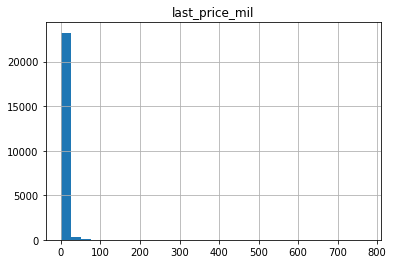

In [73]:
df_realty.hist(column='last_price_mil', bins= 30, range=(0, 770)) # plot a histogram for 'last_price_mil'
plt.show()

As we see we have a lot of values between 0 and 100. We can fix our histogram.

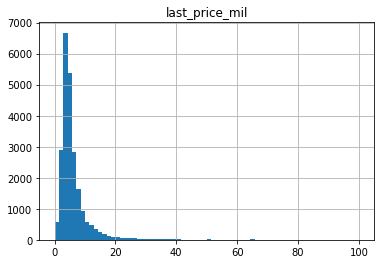

In [74]:
df_realty.hist(column='last_price_mil', bins= 70, range=(0, 100)) # plot a histogram for 'last_price_mil'
plt.show()

Look at the narrower range.

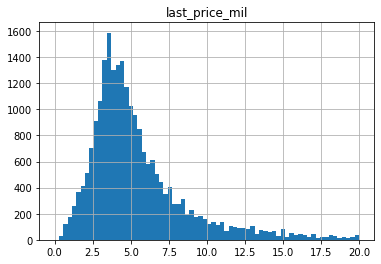

In [75]:
df_realty.hist(column='last_price_mil', bins= 70, range=(0, 20)) # plot a histogram for 'last_price_mil'
plt.show()

A lot of values are in the range of 1 to 20. Frequency of others is lower.

**Look at the "total_area" column.**

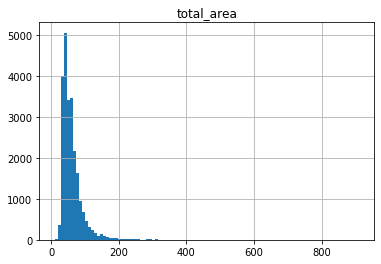

In [76]:
df_realty.hist(column='total_area', bins= 100, range=(10, 910)) # plot a histogram for 'total_area'
plt.show()

As we see we have a lot of values between 0 and 200. We can fix our histogram.

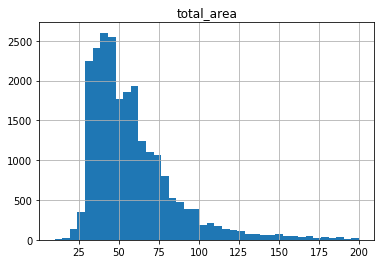

In [77]:
df_realty.hist(column='total_area', bins= 40, range=(10, 200)) # plot a histogram for 'total_area'
plt.show()

A lot of values are in the range of 25 to 150. Frequency of others is lower.

**Look at the "rooms" column.**

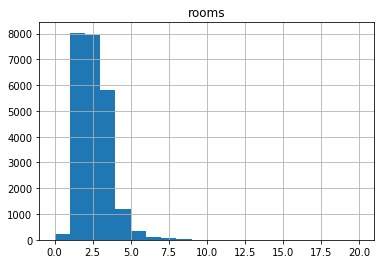

In [78]:
df_realty.hist(column='rooms', bins=20, range=(0, 20)) # plot a histogram for 'rooms'
plt.show()

As we see we have a lot of values between 1 and 10. We can fix our histogram.

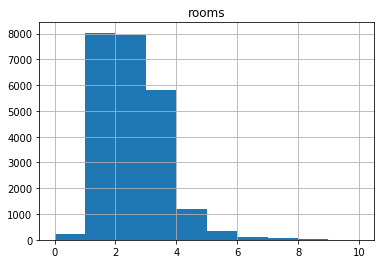

In [79]:
df_realty.hist(column='rooms', bins=10, range=(0, 10)) # plot a histogram for 'rooms'
plt.show()

A lot of values are in the range of 1 to 8. Frequency of other is small.

**Look at the "ceiling_height" column.**

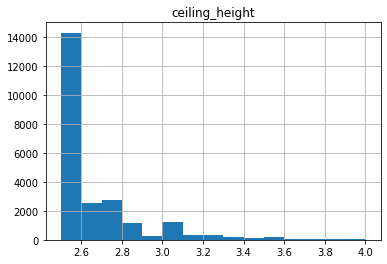

In [80]:
df_realty.hist(column='ceiling_height', bins=15, range=(2.5, 4)) # plot a histogram for 'ceiling_height'
plt.show()

Most heights are between 2.5 m and 4 m. That sounds about right.

### Conclusion

After evaluating the histograms, we set most popular ranges:
- 'last_price' is in the range of 1 to 20 millions rubles.
- 'total_area' is in the range of 25 to 150 m2.
- 'rooms' is in the range of 1 to 8.
- 'ceiling_height' is  2.5 m and 4 m.

### Examine the "days_exposition" and plot a histogram.

Examine "days_exposition".

In [81]:
df_realty['days_exposition'].describe()

count    20516.000000
mean       180.902954
std        219.733762
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

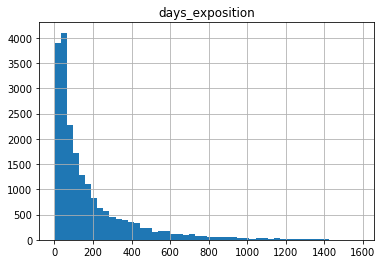

In [82]:
df_realty.hist(column='days_exposition', bins=50, range=(1, 1580)) # plot a histogram for 'days_exposition'
plt.show()

As we see we have a lot of values between 1 and 600. We can fix our histogram.

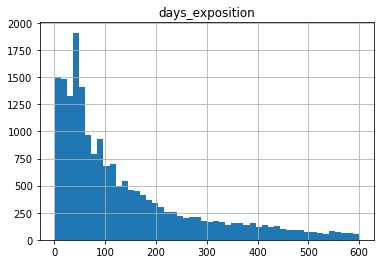

In [83]:
df_realty.hist(column='days_exposition', bins=50, range=(1, 600)) # plot a histogram for 'days_exposition'
plt.show()

Look more closer.

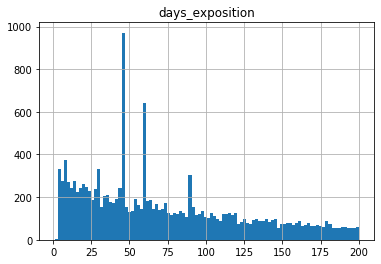

In [84]:
df_realty.hist(column='days_exposition', bins=100, range=(1, 200)) # plot a histogram for 'days_exposition'
plt.show()

We have 2 clear outliers between 40 and 60 days. These are days when ads get automatically closed if not updated.

In [85]:
days_exposition_mean = df_realty['days_exposition'].mean() # count the mean
days_exposition_mean

180.9029537921622

In [86]:
days_exposition_median = df_realty['days_exposition'].median() # count the median
days_exposition_median

95.0

'days_exposition_mean' > 'days_exposition_median', because we have outliers like max value = 1580 and between 40 and 60 days. The median is resistant to outliers. So the average time it usually takes to complete a sale is 95 days. This is because you need to show the apartment to several people in order to find a buyer. Paperwork takes some time as well.

(-50, 600)

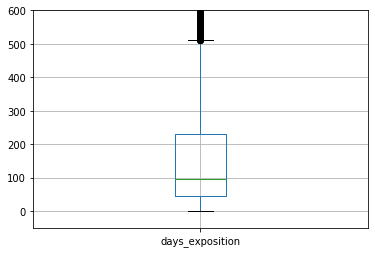

In [87]:
df_realty.boxplot(column='days_exposition') # plot boxpot for 'days_exposition'
plt.ylim(-50, 600)

### Conclusion

We set with describe method and confirmed with boxplot, that sale've happened rather quickly if it less than 45 days. And it taken an extra long time if it more than 232 days.

<font color='green'>Yes, that sounds right.

### Removing rare and outlying values and describing the patterns.

We have values, which we can remove and create slices with good data.
Good slices for 
- 'last_price_mil' is in the range of 1 to 20 millions rubles.
- 'total_area' is in the range of 25 to 150 m2.
- 'rooms' is in the range of 1 to 8.
- 'ceiling_height' is 2.5 m and 4 m.

Draw boxplot for aditional checking.

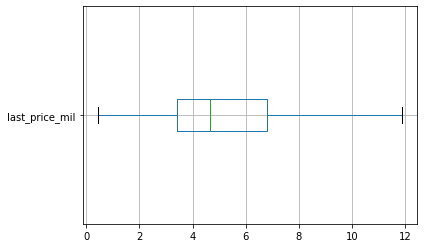

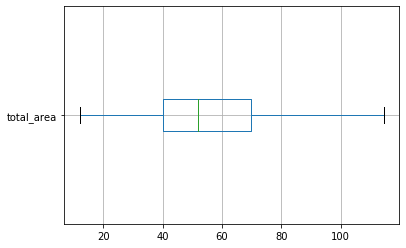

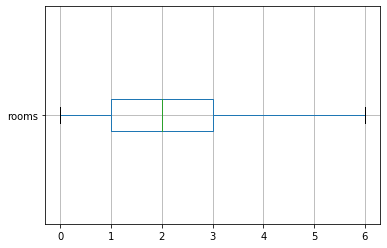

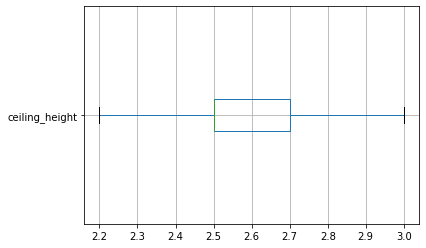

In [88]:
for col in ('last_price_mil', 'total_area', 'rooms', 'ceiling_height'):
    df_realty.boxplot(column=col, showfliers=False, vert=False) # plot boxpot
    plt.show()

Make a few changes:
- 'last_price_mil' is in the range of 1 to 12 millions rubles.
- 'total_area' is in the range of 20 to 150 m2.
- 'rooms' is in the range of 1 to 6.
- 'ceiling_height' is 2.2 m and 4 m.

In [89]:
# use the query method for choosing our "good" parameters
df_realty_good = (
    df_realty.
    query('1 <= last_price_mil <= 12 and 20 <= total_area <= 150 and 1 <= rooms <= 6 and 2.2 <= ceiling_height <= 4')
)

In [90]:
(1 - df_realty_good.shape[0] / df_realty.shape[0]) * 100 # count the percet we have lost

10.326201628898168

It's ok.

### Conclusion

- 'last_price' is in the range of 1 to 12 millions rubles. Usually we have econom and medium type of apartment. That's why we such range.
- 'total_area' is in the range of 20 to 150 m2. It's medium sizes for apartment. And it's old city with small apartment square. 
- 'rooms' is in the range of 1 to 6. Usually people don't need more rooms and they cannot afford this, because it's expensive.
- 'ceiling_height' is 2.2 m and 4 m. If we have height above 4 m, we pay a lot for heating. 2.2 is the minimal standard.

### Which factors have had the biggest influence on an apartment’s price?

**Look at the "total_area" and "last_price_mil".**

In [91]:
df_realty_good['last_price_mil'].corr(df_realty_good['total_area']) # use corr to count correlation between 'last_price_mil' and 'total_area'

0.7079203532862293

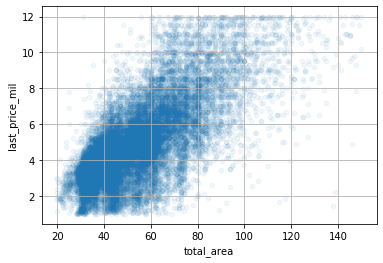

In [92]:
df_realty_good.plot(kind='scatter', x='total_area', y='last_price_mil', grid=True, alpha=0.06) # plot the scatter plot
plt.show()

The Pearson correlation coefficient = 0.71. It's strong correlation. If "last_price_mil" is rising, that "total_area" is rising as well.

**Look at the "rooms" and "last_price_mil".**

In [93]:
df_realty_good['last_price_mil'].corr(df_realty_good['rooms']) # use corr to count correlation between 'last_price_mil' and 'rooms'

0.4522825857399437

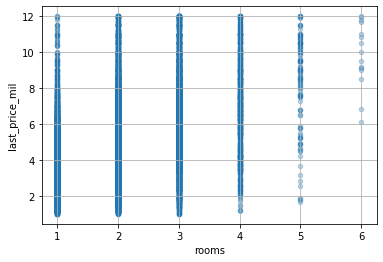

In [94]:
df_realty_good.plot(kind='scatter', x='rooms', y='last_price_mil', grid=True, alpha=0.3) # plot the scatter plot
plt.show()

In [95]:
df_realty_good_rooms = df_realty_good.pivot_table(index='rooms', values='last_price_mil', aggfunc='median')
df_realty_good_rooms

,last_price_mil
rooms,
1,3.6000
2,4.7000
3,5.7500
4,7.0000
5,8.9945
6,9.9900


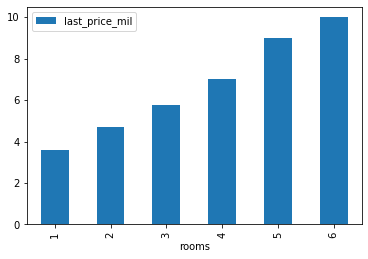

In [96]:
df_realty_good_rooms.plot(y='last_price_mil', kind='bar') # plot the bar plot
plt.show()

The Pearson correlation coefficient = 0.45, close to zero means that the connection is either weak. But for median price, when the number of rooms is rising, the price is rising as well.

**Look at the "floor_level" and "last_price_mil".**

In [97]:
# use pivot_table 
df_realty_floor_good_level = df_realty_good.pivot_table(index='floor_level', values='last_price_mil', aggfunc='median')
df_realty_floor_good_level

,last_price_mil
floor_level,
first,3.900
last,4.135
other,4.600


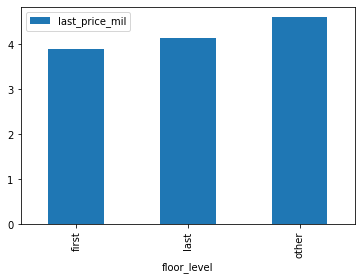

In [98]:
df_realty_floor_good_level.plot(y='last_price_mil', kind='bar') # plot the bar plot
plt.show()

As we see if the apartment on the 1st floor, the price is lower than the last floor. And other floors are more expensive.

**Look at the "cityCenters_nearest" and "last_price_mil".**

In [99]:
df_realty_good['last_price_mil'].corr(df_realty_good['cityCenters_nearest']) # use corr to count correlation between 'last_price_mil' and 'cityCenters_nearest'

-0.3533145487196349

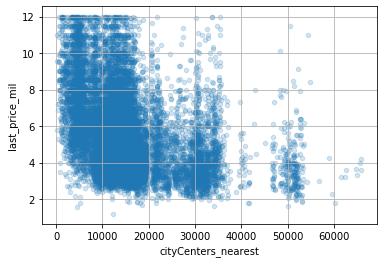

In [100]:
df_realty_good.plot(kind='scatter', x='cityCenters_nearest', y='last_price_mil', grid=True, alpha=0.2) # plot the scatter plot
plt.show()

The Pearson correlation coefficient = -0.35, close to zero means that the connection is either weak. But we can see that the price is higher in the city center. And it goes down after 15000 m.

**Study correlation to the publication date.**

*Look at the 'last_price_mil' and 'weekday'*

In [101]:
# use pivot_table 
df_realty_weekday_good = df_realty_good.pivot_table(index='weekday', values='last_price_mil', aggfunc='median')
df_realty_weekday_good

,last_price_mil
weekday,
0,4.50
1,4.50
2,4.50
3,4.45
4,4.45
5,4.45
6,4.45


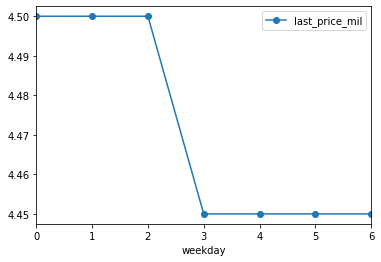

In [102]:
df_realty_weekday_good.plot(y='last_price_mil', style='o-') # plot the line chart
plt.show()

We cann't notice some kind of pattern.

*Look at the 'last_price_mil' and 'month'*

In [103]:
# use pivot_table 
df_realty_month_good = df_realty_good.pivot_table(index='month', values='last_price_mil', aggfunc='median')
df_realty_month_good

,last_price_mil
month,
1,4.50
2,4.49
3,4.50
4,4.60
5,4.40
6,4.25
7,4.45
8,4.45
9,4.50


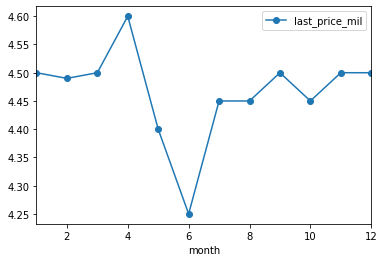

In [104]:
df_realty_month_good.plot(y='last_price_mil', style='o-') # plot the line chart
plt.show()

We cann't notice some kind of pattern.

*Look at the 'last_price_mil' and 'year'*

In [105]:
# use pivot_table 
df_realty_year_good = df_realty_good.pivot_table(index='year', values='last_price_mil', aggfunc='median')
df_realty_year_good

,last_price_mil
year,
2014,5.500
2015,4.950
2016,4.300
2017,4.300
2018,4.470
2019,4.899


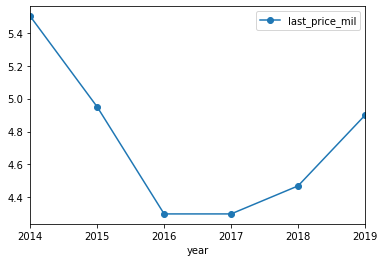

In [106]:
df_realty_year_good.plot(y='last_price_mil', style='o-') # plot the line chart
plt.show()

We can notice some kind of pattern. The price is deacreasing until to 2017. And after that it's rising.

### Conclusion

- The biggest influence on an apartment’s price have "total_area", "floor_level", "cityCenters_nearest", "rooms".  
- "cityCenters_nearest" and "rooms" have low Pearson correlation coefficient. But this coefficient unstable to outliers. So it doesn't fit here.  
- "weekday", "month", "year" haven't got any influence on the price. We have some kind of pattern in "year".

### 10 places with the largest number of ads.

In [107]:
# use pivot_table 
df_realty_good_city = df_realty_good.pivot_table(index='locality_name', values='price_m2', aggfunc=['count','median'])
df_realty_good_city.columns = ['count', 'median']

df_realty_good_city_10 = (
    df_realty_good_city.
    sort_values(by='count', ascending=False).head(10) # sort by 'count'
    .sort_values(by='median', ascending=False) # sort by 'median'
)

df_realty_good_city_10

,count,median
locality_name,,
Saint Petersburg,13733,101851.851852
Пушкин,337,98214.285714
посёлок Парголово,321,91917.591125
деревня Кудрово,280,91618.217054
посёлок Мурино,495,84239.130435
посёлок Шушары,436,76747.967480
Колпино,336,74689.878234
Гатчина,304,67746.286082
Всеволожск,387,65789.473684


### Conclusion

The highest apartment price per m2 in Saint Petersburg. And the lowest in the "Выборг". Saint Petersburg is the region center. And "Выборг" is nearby Saint Petersburg. And it has a lot of great apartment.

### To pinpoint which area is considered to be downtown

In [108]:
# mask = df_realty['locality_name'] == 'Saint Petersburg'
# df_realty.loc[mask, 'last_price'] = df_realty.loc[mask, 'last_price'].fillna(df_realty.loc[mask, 'last_price'].median())

In [109]:
df_realty['cityCenters_nearest_km'] = (df_realty[~(df_realty['cityCenters_nearest'].isnull())]['cityCenters_nearest'] / 1000).astype(int) # convert m to km
df_realty_peter = df_realty.query('locality_name == "Saint Petersburg"') # choose Saint Petersburg rows

In [110]:
# use pivot_table 
df_realty_peter = df_realty.pivot_table(index='cityCenters_nearest_km', values='last_price_mil', aggfunc='median')
df_realty_peter

,last_price_mil
cityCenters_nearest_km,
0.0,11.75
1.0,10.95
2.0,9.50
3.0,8.50
4.0,9.90
...,...
60.0,1.80
61.0,3.20
62.0,3.40


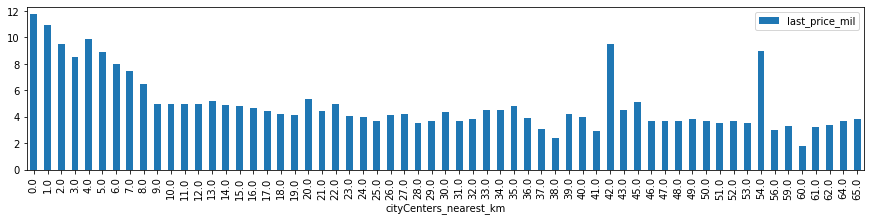

In [111]:
df_realty_peter.plot(y='last_price_mil', kind='bar', figsize=(15, 3)) # plot the bar plot
plt.show()

### Conclusion

After 8 km the price is falling sharply, as we can see on the histogram . This is turning point, which indicate downtown.

### Select a segment of apartments in the downtown, then analyze this area

**Build scatter plots in pairs for 'total_area', 'last_price_mil', 'rooms', 'ceiling_height' columns.**

In [112]:
df_realty_center = (
    df_realty.
    query('1 <= last_price_mil <= 12 and 20 <= total_area <= 150 and 1 <= rooms <= 6 and 2.2 <= ceiling_height <= 4 and cityCenters_nearest_km <= 8')
)

In [113]:
# choose the 'total_area', 'last_price_mil', 'rooms', 'ceiling_height' columns
df_realty_center_pir = df_realty_center.loc[:, ['total_area', 'last_price_mil', 'rooms', 'ceiling_height']]

Each cell shows the interrelation between a pair of parameters.

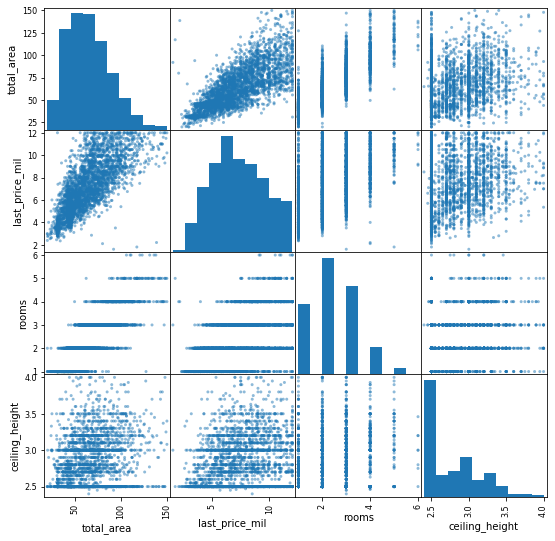

In [114]:
# build scatter plots in pairs 
pd.plotting.scatter_matrix(df_realty_center_pir, figsize=(9, 9))
plt.show()

In [115]:
df_realty_center_pir.corr() # count Pearson correlation coefficient 

,total_area,last_price_mil,rooms,ceiling_height
total_area,1.000000,0.722871,0.813330,0.271438
last_price_mil,0.722871,1.000000,0.489496,0.242440
rooms,0.813330,0.489496,1.000000,0.230791
ceiling_height,0.271438,0.242440,0.230791,1.000000


### Conclusion

We can see that:
- Pearson correlation coefficient is 0.81 for "total_area" and "rooms". It's strong connection. "total_area" increases, "rooms" increases as well.
- Pearson correlation coefficient is 0.72 for "total_area" and "last_price_mil". It's strong connection. "total_area" increases, "last_price_mil" increases as well.
- There is the weak connection for remain columns.

**Look at the "total_area" and "last_price_mil".**

In [116]:
df_realty_center['last_price_mil'].corr(df_realty_center['total_area']) # use corr to count correlation between 'last_price_mil' and 'total_area'

0.722870783178275

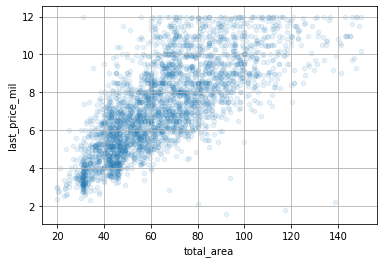

In [117]:
df_realty_center.plot(kind='scatter', x='total_area', y='last_price_mil', grid=True, alpha=0.1) # plot the scatter plot
plt.show()

The Pearson correlation coefficient = 0.72. It's strong correlation. If "last_price_mil" is rising, that "total_area" is rising as well.

**Look at the "rooms" and "last_price_mil".**

In [118]:
df_realty_center['last_price_mil'].corr(df_realty_center['rooms']) # use corr to count correlation between 'last_price_mil' and 'rooms'

0.489496336089338

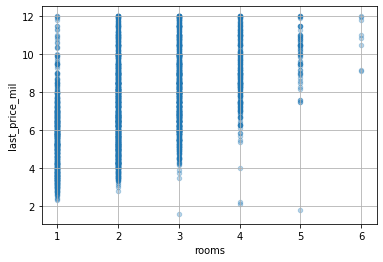

In [119]:
df_realty_center.plot(kind='scatter', x='rooms', y='last_price_mil', grid=True, alpha=0.3) # plot the scatter plot
plt.show()

In [120]:
# use the pivot table for with median and count for "last_price_mil", "total_area"
df_realty_center_rooms = df_realty_center.pivot_table(index='rooms', values=['last_price_mil', 'total_area'], aggfunc={'last_price_mil': ['median', 'count'], 'total_area': 'median'})
df_realty_center_rooms.columns = ['rooms_count_center', 'last_price_mil', 'total_area_median']
# count "rooms_count_center_per" percent
df_realty_center_rooms['rooms_count_center_per'] = df_realty_center_rooms['rooms_count_center'] / df_realty_center_rooms['rooms_count_center'].sum() * 100
df_realty_center_rooms

,rooms_count_center,last_price_mil,total_area_median,rooms_count_center_per
rooms,,,,
1,689,5.578947,40.30,22.769332
2,1133,6.800000,58.00,37.442168
3,865,8.000000,77.00,28.585592
4,267,9.000000,97.20,8.823529
5,64,10.300000,118.00,2.115003
6,8,10.940000,121.85,0.264375


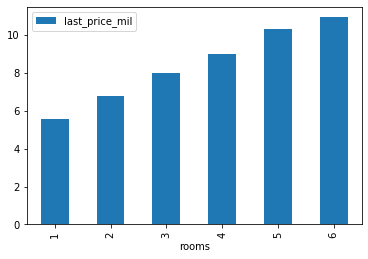

In [121]:
df_realty_center_rooms.plot(y='last_price_mil', kind='bar') # plot the bar plot
plt.show()

The Pearson correlation coefficient = 0.48, close to zero means that the connection is either weak. But for median price, when the number of rooms is rising, the price is rising as well.

**Look at the "floor_level" and "last_price_mil".**

In [122]:
# use pivot_table 
df_realty_center_level = df_realty_center.pivot_table(index='floor_level', values='last_price_mil', aggfunc='median')
df_realty_center_level

,last_price_mil
floor_level,
first,5.95
last,7.30
other,7.40


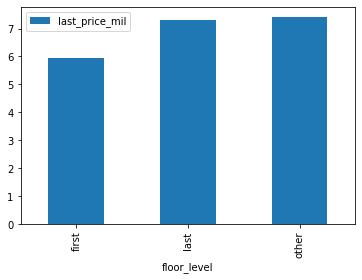

In [123]:
df_realty_center_level.plot(y='last_price_mil', kind='bar') # plot the bar plot
plt.show()

As we see if the apartment on the 1st floor, the price is lower than the last floor. And other floors are more expensive.

**Look at the "cityCenters_nearest" and "last_price_mil".**

In [124]:
df_realty_center['last_price_mil'].corr(df_realty_center['cityCenters_nearest']) # use corr to count correlation between 'last_price_mil' and 'cityCenters_nearest'

-0.25440513194173947

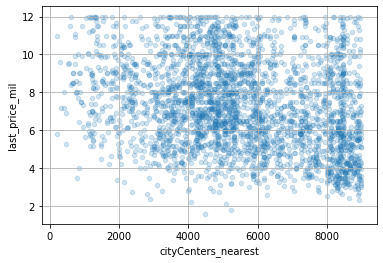

In [125]:
df_realty_center.plot(kind='scatter', x='cityCenters_nearest', y='last_price_mil', grid=True, alpha=0.2) # plot the scatter plot
plt.show()

The Pearson correlation coefficient = -0.25, close to zero means that the connection is either weak.

**Study correlation to the publication date.**

*Look at the 'last_price_mil' and 'weekday'*

In [126]:
# use pivot_table 
df_realty_center_weekday = df_realty_center.pivot_table(index='weekday', values='last_price_mil', aggfunc='median')
df_realty_center_weekday

,last_price_mil
weekday,
0,7.100
1,7.000
2,7.200
3,7.000
4,7.225
5,6.999
6,7.550


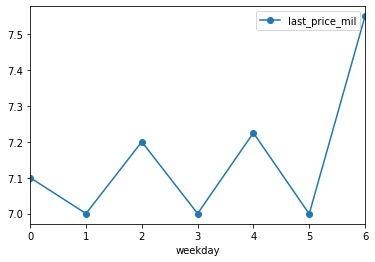

In [127]:
df_realty_center_weekday.plot(y='last_price_mil', style='o-') # plot the line chart
plt.show()

We cann't notice some kind of pattern.

*Look at the 'last_price_mil' and 'month'*

In [128]:
# use pivot_table 
df_realty_center_month = df_realty_center.pivot_table(index='month', values='last_price_mil', aggfunc='median')
df_realty_center_month

,last_price_mil
month,
1,7.050000
2,7.300000
3,7.161827
4,7.150000
5,6.999000
6,6.980000
7,7.300000
8,7.185000
9,7.715000


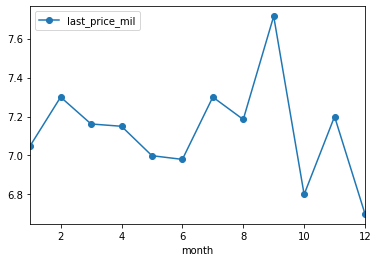

In [129]:
df_realty_center_month.plot(y='last_price_mil', style='o-') # plot the line chart
plt.show()

We cann't notice some kind of pattern.

*Look at the 'last_price_mil' and 'year'*

In [130]:
# use pivot_table 
df_realty_center_year = df_realty_center.pivot_table(index='year', values='last_price_mil', aggfunc='median')
df_realty_center_year

,last_price_mil
year,
2014,7.7685
2015,7.4500
2016,7.1000
2017,6.9900
2018,7.0000
2019,7.4900


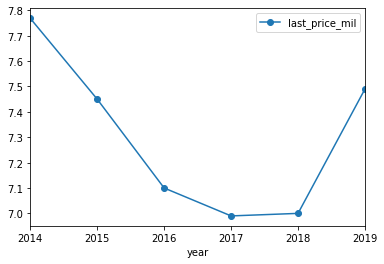

In [131]:
df_realty_center_year.plot(y='last_price_mil', style='o-') # plot the line chart
plt.show()

We can notice some kind of pattern. The price is deacreasing until to 2017. And after that it's rising.

**Additional comparisons between the downtown and the rest of the city.**

*Comparisons between the "rooms", "total_area" in the downtown and the rest of the city.*

In [132]:
df_realty_not_center = (
    df_realty.
    query('1 <= last_price_mil <= 12 and 20 <= total_area <= 150 and 1 <= rooms <= 6 and 2.2 <= ceiling_height <= 4 and cityCenters_nearest_km > 8')
)

In [133]:
# use the pivot table for with median and count for "last_price_mil", "total_area"
df_realty_not_center_rooms = df_realty_not_center.pivot_table(index='rooms', values=['last_price_mil', 'total_area'], aggfunc={'last_price_mil': ['median', 'count'], 'total_area': 'median'})
df_realty_not_center_rooms.columns = ['rooms_count_not_center', 'last_price_mil', 'total_area_median']
# count "rooms_count_not_center_per" percent
df_realty_not_center_rooms['rooms_count_not_center_per'] = df_realty_not_center_rooms['rooms_count_not_center'] / df_realty_not_center_rooms['rooms_count_not_center'].sum() * 100
df_realty_not_center_rooms

,rooms_count_not_center,last_price_mil,total_area_median,rooms_count_not_center_per
rooms,,,,
1,5135,3.8100,37.00,39.315519
2,4479,4.9500,52.00,34.292933
3,3022,5.8445,67.65,23.137585
4,385,6.3800,77.10,2.947707
5,34,7.8250,103.95,0.260317
6,6,9.2500,119.50,0.045938


In [134]:
df_realty_not_center_rooms['rooms_count_center_per'] = df_realty_center_rooms['rooms_count_center_per']
df_realty_not_center_rooms['total_area_center_median'] = df_realty_center_rooms['total_area_median']
df_realty_not_center_rooms

,rooms_count_not_center,last_price_mil,total_area_median,rooms_count_not_center_per,rooms_count_center_per,total_area_center_median
rooms,,,,,,
1,5135,3.8100,37.00,39.315519,22.769332,40.30
2,4479,4.9500,52.00,34.292933,37.442168,58.00
3,3022,5.8445,67.65,23.137585,28.585592,77.00
4,385,6.3800,77.10,2.947707,8.823529,97.20
5,34,7.8250,103.95,0.260317,2.115003,118.00
6,6,9.2500,119.50,0.045938,0.264375,121.85


Draw the bar plot for "rooms_count_not_center_per" and "rooms_count_center_per".

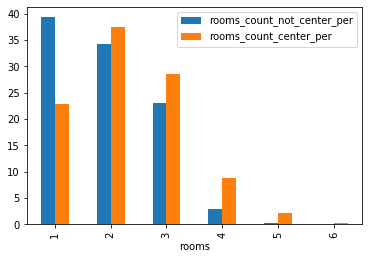

In [135]:
df_realty_not_center_rooms[['rooms_count_not_center_per','rooms_count_center_per']].plot(kind='bar') # plot the bar plot
plt.show()

In the city center there are more apartments from 2 rooms and above, and in the rest of the city there are more one-room apartments.

Draw the bar plot for "rooms_count_not_center_per" and "rooms_count_center_per".

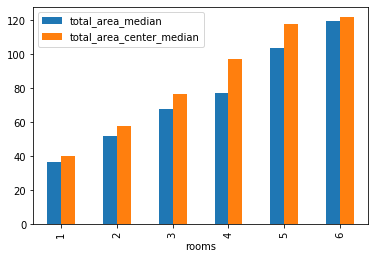

In [136]:
df_realty_not_center_rooms[['total_area_median','total_area_center_median']].plot(kind='bar') # plot the bar plot
plt.show()

The average area is higher for apartments in the center.

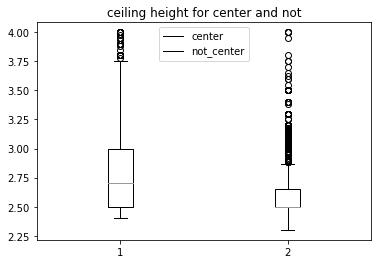

In [137]:
df = [df_realty_center['ceiling_height'], df_realty_not_center['ceiling_height']]
fig, ax = plt.subplots()
ax.set_title('ceiling height for center and not')
ax.boxplot(df) # plot boxpot
plt.legend(('center', 'not_center'), loc='upper center')
plt.show()

In the downtown we have a higher ceiling (median = 2.75 m) than in the rest of the city (median = 2.5 m).

### Conclusion

- The biggest influence on an apartment’s price have "total_area", "floor_level", "rooms" , as in the past, for the "df_realty_good".  
- For median price, when the number of rooms is rising, the price is rising as well.
- "cityCenters_nearest" has low Pearson correlation coefficient and there is no any connection on the graph.  
- "weekday", "month", "year" haven't got any influence on the price. We have some kind of pattern in "year".
- "total_area", "ceiling_height" is more in the downtown. And there are more apartments from 2 rooms and above.

### Step 5. Overall conclusion

*The main task:*

Need to learn how to determine the market value of real estate properties. Our task is to define the parameters.   

*Conclusion:*  

The main parameter is "total_area". It has strong Pearson correlation coefficient. So "total_area" has the biggest influence on an apartment’s price.
"floor_level" and "rooms" have influence as well. 
There's strong connection between "total_area" and "rooms". "total_area" increases, "rooms" increases as well.
"cityCenters_nearest" has influence, but it doesn't matter when we consider downtown.  
"total_area", "ceiling_height" is more in the downtown. And there are more apartments from 2 rooms and above.

We set most popular ranges as well:
- "last_price" is in the range of 1 to 12 millions rubles.
- "total_area" is in the range of 20 to 150 m2.
- "rooms" is in the range of 1 to 6.
- "ceiling_height" is 2.2 m and 4 m.